In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.dpi'] = 450

In [2]:
directory = '/Volumes/Data2/RST/notebook/'

In [3]:
ward_trips = pd.read_csv(directory + 'TTS OD/WARD_TYPE.csv')
ward_trips

,ward_o,ward_d,type,total
0,1,1,ab_am,0.552704
1,1,1,ab_ev,0.118363
2,1,1,ab_md,0.811149
3,1,1,ab_pm,0.973774
4,1,1,bl_am,168.513442
...,...,...,...,...
15777,25,25,rac_pm,399.066513
15778,25,25,raw_am,423.889255
15779,25,25,raw_ev,206.497937
15780,25,25,raw_md,140.284162


In [4]:
cluster = pd.read_csv('cluster.csv')

In [5]:
ward_trips['group'] = ward_trips['type'].str.split('_', expand = True)[0]
ward_trips['period'] = ward_trips['type'].str.split('_', expand = True)[1].str.upper()


In [6]:
ward_trip_total = ward_trips.groupby(['group', 'period']).sum()[['total']].reset_index()

In [7]:
origin_cc = ward_trips.merge(cluster[['ward', 'cc_normalized', 'period']], left_on = ['ward_o', 'period'], right_on = ['ward', 'period'])
origin_cc['weighted_cc'] = origin_cc['cc_normalized'] * origin_cc['total']  
origin_cc = origin_cc.groupby(['group', 'period']).sum()[['weighted_cc']].reset_index().sort_values(
    by = ['period', 'weighted_cc'], ascending =  False)

In [8]:
origin_cc = origin_cc.merge(ward_trip_total)
origin_cc['avg_cc'] = origin_cc['weighted_cc']/origin_cc['total']
origin_cc.sort_values(by = ['period', 'avg_cc'], ascending =  False)

,group,period,weighted_cc,total,avg_cc
5,imm,PM,3247.165931,14543.038559,0.223280
1,rac,PM,22013.991391,98678.217618,0.223089
2,c0,PM,15914.373348,71456.318609,0.222715
0,raw,PM,45205.419608,204036.850191,0.221555
6,lep,PM,1976.853709,8962.136141,0.220578
7,ab,PM,80.599836,365.565840,0.220480
3,lico,PM,11236.947375,51047.772549,0.220126
4,bl,PM,3498.077885,15936.260026,0.219504
13,imm,MD,672.081920,4375.865242,0.153588
9,rac,MD,4562.601822,30321.167790,0.150476


In [9]:
dest_cc = ward_trips.merge(cluster[['ward', 'cc_normalized', 'period']], left_on = ['ward_d', 'period'], right_on = ['ward', 'period'])
dest_cc['weighted_cc'] = dest_cc['cc_normalized'] * dest_cc['total']  
dest_cc = dest_cc.groupby(['group', 'period']).sum()[['weighted_cc']].reset_index().sort_values(
    by = ['period', 'weighted_cc'], ascending =  False)

dest_cc = dest_cc.merge(ward_trip_total)
dest_cc['avg_cc'] = dest_cc['weighted_cc']/dest_cc['total']
dest_cc.sort_values(by = ['period', 'avg_cc'], ascending =  False)

,group,period,weighted_cc,total,avg_cc
5,imm,PM,3328.965128,14543.038559,0.228904
1,rac,PM,22487.039774,98678.217618,0.227883
3,lico,PM,11563.596382,51047.772549,0.226525
0,raw,PM,45099.583205,204036.850191,0.221036
6,lep,PM,1978.131549,8962.136141,0.220721
2,c0,PM,15767.249819,71456.318609,0.220656
4,bl,PM,3453.791458,15936.260026,0.216725
7,ab,PM,77.441645,365.565840,0.211840
13,imm,MD,631.465825,4375.865242,0.144307
9,rac,MD,4346.917208,30321.167790,0.143362


In [10]:
od_cc = ward_trips.merge(cluster[['ward', 'cc_normalized', 'period']], left_on = ['ward_o', 'period'], right_on = ['ward', 'period'])
od_cc = od_cc.merge(cluster[['ward', 'cc_normalized', 'period']], left_on = ['ward_d', 'period'], right_on = ['ward', 'period'])
od_cc['od_cc'] = (od_cc['cc_normalized_x'] + od_cc['cc_normalized_y'])/2

In [11]:
od_cc['weighted_cc'] = od_cc['od_cc'] * od_cc['total']  
od_cc = od_cc.groupby(['group', 'period']).sum()[['weighted_cc']].reset_index().sort_values(
    by = ['period', 'weighted_cc'], ascending =  False)

od_cc = od_cc.merge(ward_trip_total)
od_cc['avg_cc'] = od_cc['weighted_cc']/od_cc['total']
od_cc.sort_values(by = ['period', 'avg_cc'], ascending =  False)

,group,period,weighted_cc,total,avg_cc
5,imm,PM,3288.065530,14543.038559,0.226092
1,rac,PM,22250.515582,98678.217618,0.225486
3,lico,PM,11400.271879,51047.772549,0.223326
2,c0,PM,15840.811583,71456.318609,0.221685
0,raw,PM,45152.501406,204036.850191,0.221296
6,lep,PM,1977.492629,8962.136141,0.220650
4,bl,PM,3475.934672,15936.260026,0.218115
7,ab,PM,79.020740,365.565840,0.216160
13,imm,MD,651.773872,4375.865242,0.148947
9,rac,MD,4454.759515,30321.167790,0.146919


In [12]:
od_cc = od_cc.sort_values(by = ['period', 'group'], ascending =  False)

In [13]:
group_df = pd.DataFrame.from_records([['Racialized', 'rac'],
 ['Black', 'bl'],
[ 'Recent\nImmigrants', 'imm'],
 ['Low\nIncome', 'lico'],
[ 'Carless\nHouseholds', 'c0'],
[ 'LEP', 'lep'],
[ 'General\nPopulation', 'raw']], columns = ['Group String', 'group'])

In [14]:
origin_cc = origin_cc.merge(group_df)
dest_cc = dest_cc.merge(group_df)
od_cc = od_cc.merge(group_df)


In [15]:
od_cc_pivot = od_cc.pivot('period', 'Group String', 'avg_cc').reindex(['EM','AM','MD','PM','EV'],axis = 0)
od_cc_pivot = od_cc_pivot.reindex(['Black', 'Low\nIncome', 'LEP', 'General\nPopulation',
                                    'Carless\nHouseholds', 'Racialized', 'Recent\nImmigrants'],axis = 1)

In [16]:
od_cc_pivot

Group String,Black,Low\nIncome,LEP,General\nPopulation,Carless\nHouseholds,Racialized,Recent\nImmigrants
period,,,,,,,
EM,0.025162,0.026017,0.025536,0.026711,0.026126,0.026667,0.026366
AM,0.240583,0.250871,0.248502,0.247324,0.245314,0.251992,0.253666
MD,0.142492,0.145112,0.145486,0.143264,0.144412,0.146919,0.148947
PM,0.218115,0.223326,0.220650,0.221296,0.221685,0.225486,0.226092
EV,0.129638,0.134983,0.131786,0.131178,0.131834,0.134378,0.134211


In [17]:
od_cc_pivot_n = od_cc_pivot.div(od_cc_pivot.max(axis=1), axis=0)
od_cc_pivot_n

Group String,Black,Low\nIncome,LEP,General\nPopulation,Carless\nHouseholds,Racialized,Recent\nImmigrants
period,,,,,,,
EM,0.941988,0.974023,0.956018,1.000000,0.978073,0.998359,0.987085
AM,0.948428,0.988983,0.979644,0.975002,0.967075,0.993404,1.000000
MD,0.956657,0.974250,0.976763,0.961841,0.969549,0.986382,1.000000
PM,0.964717,0.987764,0.975929,0.978786,0.980509,0.997318,1.000000
EV,0.960403,1.000000,0.976319,0.971814,0.976671,0.995518,0.994277


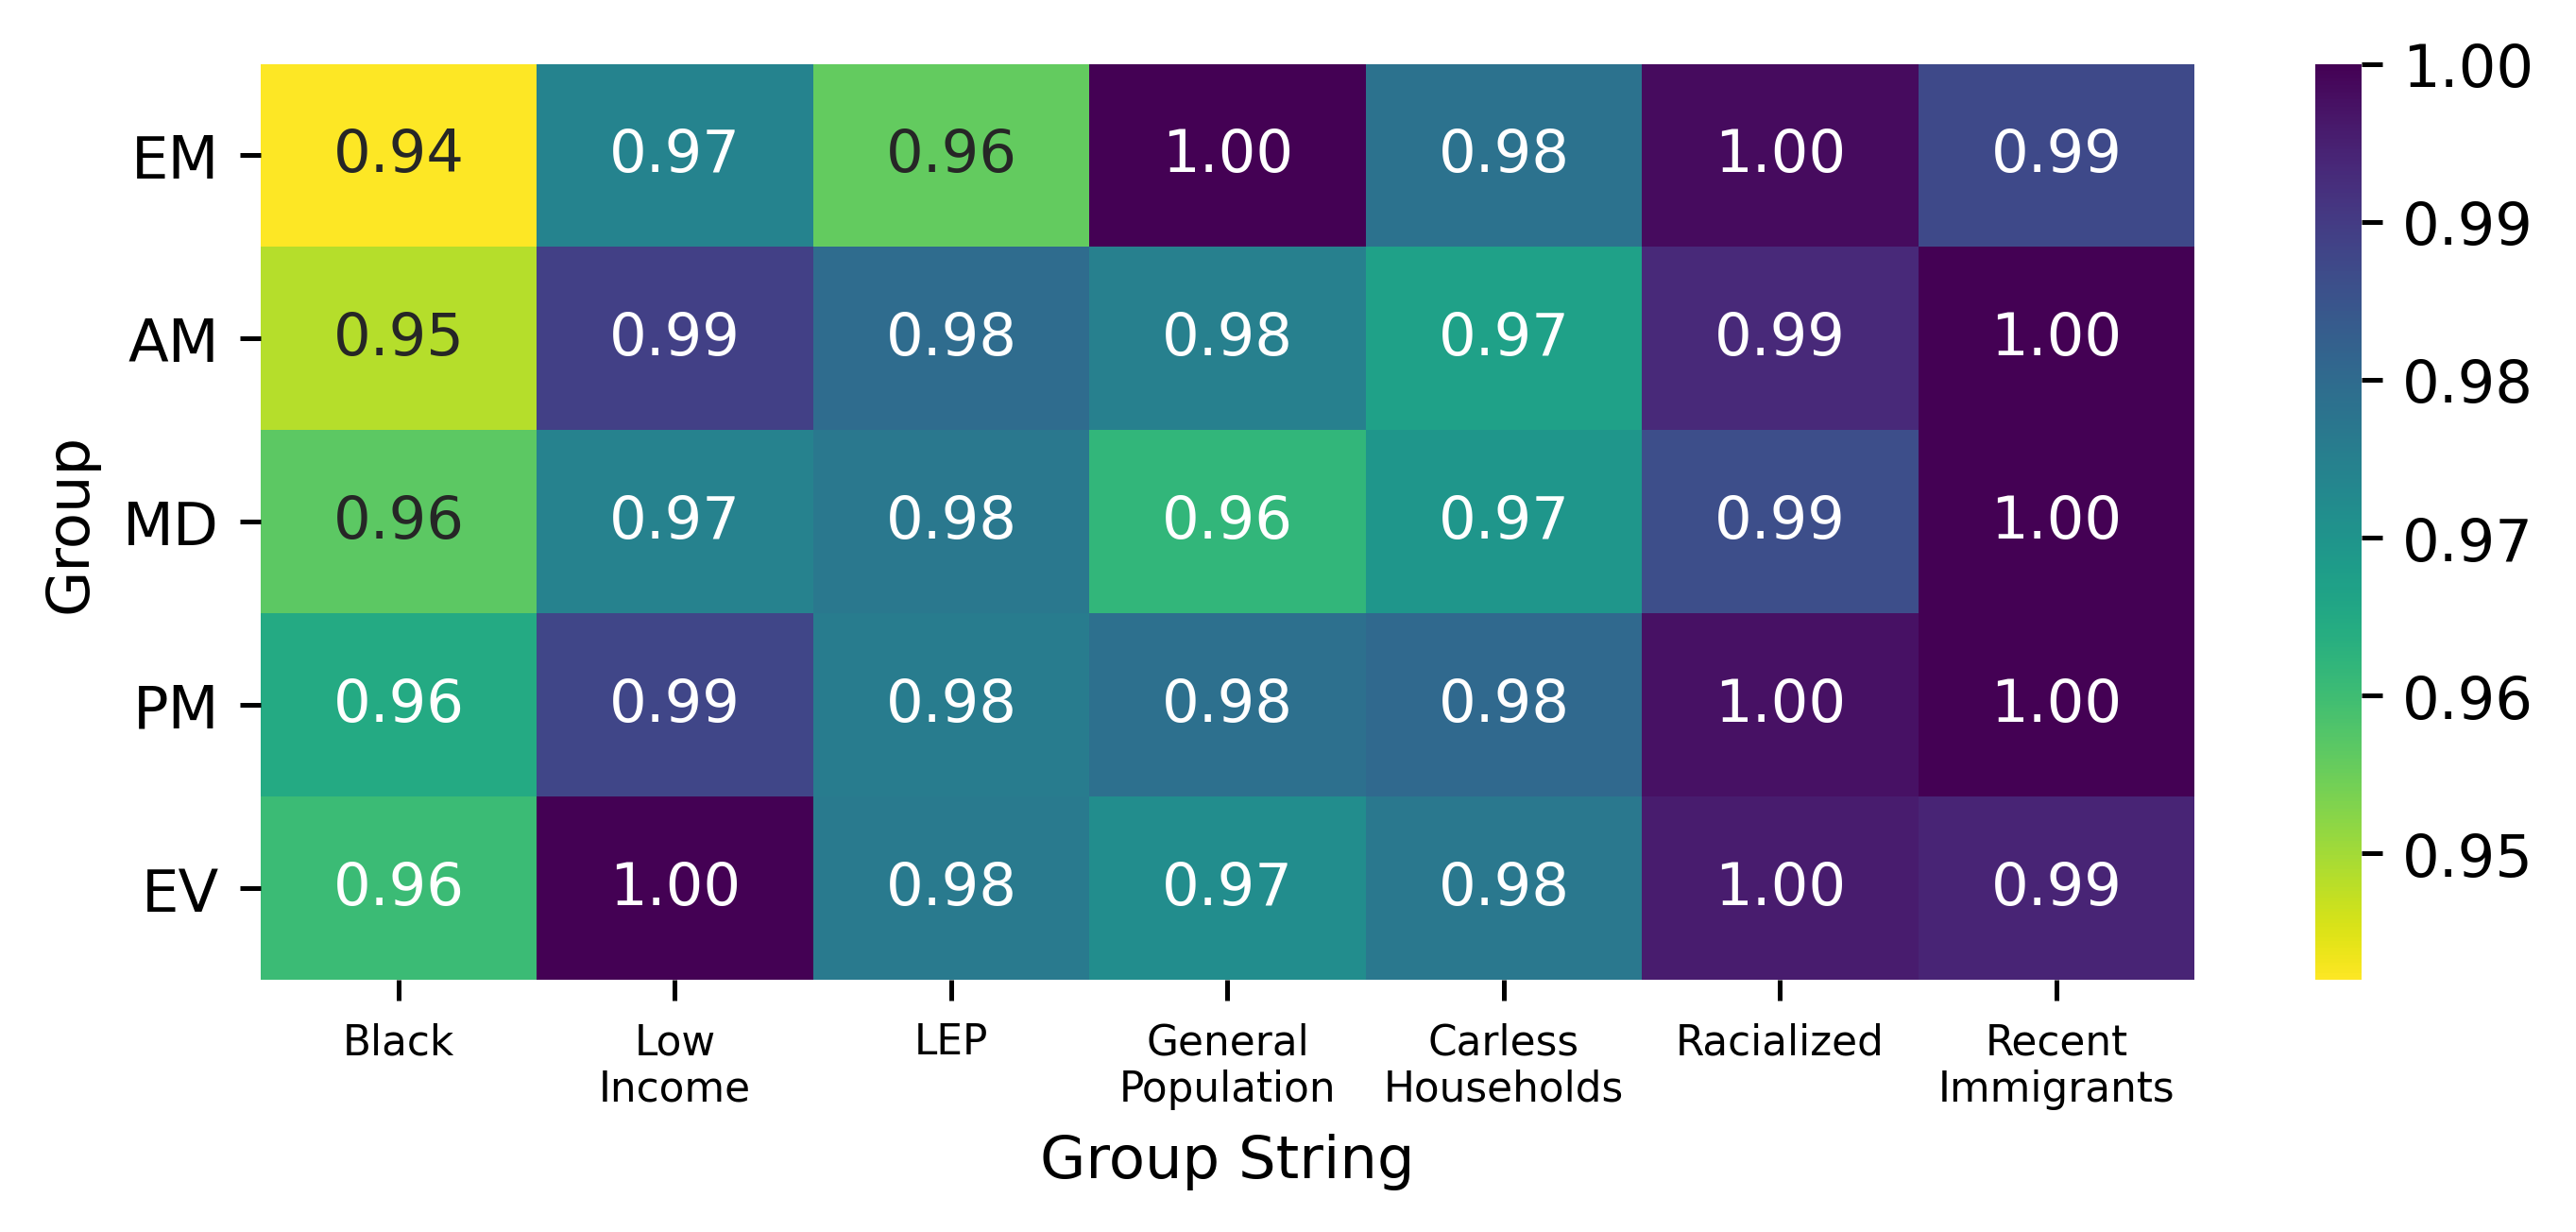

In [18]:
import seaborn as sns

fig, ax = plt.subplots()

fig.set_size_inches([6.5,3])

sns.heatmap(od_cc_pivot_n, ax = ax, cmap = 'viridis_r', annot=True, fmt = '.2f', 
                vmin = od_cc_pivot_n.min().min(), vmax = 1)

ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='x', rotation=0)

ax.set_ylabel('Period')
ax.set_ylabel('Group')
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 7)
plt.tight_layout()
plt.savefig('cluster.png', dpi = 300)